# Facial Landmark Detection with OpenCV

![picture](https://paperswithcode.com/media/tasks/Screenshot_2019-11-22_at_20.21.00_jiyQulV.png)

# Introduction

We are going to use dlib and OpenCV to detect facial landmarks in an image.

Facial landmarks are used to localize and represent salient regions of the face, such as:

  - Eyes
  - Eyebrows
  - Nose
  - Mouth
  - Jawline

Facial landmarks have been successfully applied to `face alignment`, `head pose estimation`, `face swapping`, `blink detection` and much more.

## What are Facial Landmarks ?

Detecting facial landmarks is a subset of the shape prediction problem. Given an input image (and normally an ROI that specifies the object of interest), a shape predictor attempts to localize key points of interest along the shape.

In the context of facial landmarks, our goal is detect important facial structures on the face using shape prediction methods.

Detecting facial landmarks is therefore a two step process:

`Step #1`: Localize the face in the image.
`Step #2`: Detect the key facial structures on the face ROI.

Face detection (Step #1) can be achieved in a number of ways.

We could use OpenCV’s built-in Haar cascades.

We might apply a pre-trained HOG + Linear SVM object detector specifically for the task of face detection.

Or we might even use deep learning-based algorithms for face localization.

In either case, the actual algorithm used to detect the face in the image doesn’t matter. Instead, what’s important is that through some method we obtain the face bounding box (i.e., the (x, y)-coordinates of the face in the image).

Given the face region we can then apply Step #2: detecting key facial structures in the face region.

There are a variety of facial landmark detectors, but all methods essentially try to localize and label the following facial regions:

  - Mouth
  - Right eyebrow
  - Left eyebrow
  - Right eye
  - Left eye
  - Nose
  - Jaw

The facial landmark detector included in the dlib library is an implementation of the [One Millisecond Face Alignment with an Ensemble of Regression Trees paper by Kazemi and Sullivan (2014)](https://pdfs.semanticscholar.org/d78b/6a5b0dcaa81b1faea5fb0000045a62513567.pdf).

This method starts by using:

A training set of labeled facial landmarks on an image. These images are manually labeled, specifying specific (x, y)-coordinates of regions surrounding each facial structure.
Priors, of more specifically, the probability on distance between pairs of input pixels.
Given this training data, an ensemble of regression trees are trained to estimate the facial landmark positions directly from the pixel intensities themselves (i.e., no “feature extraction” is taking place).

The end result is a facial landmark detector that can be used to detect facial landmarks in real-time with high quality predictions.

For more information and details on this specific technique, be sure to read the paper by Kazemi and Sullivan linked to above, along with the official dlib announcement.

## Understanding dlib’s facial landmark detector

The pre-trained facial landmark detector inside the dlib library is used to estimate the location of 68 (x, y)-coordinates that map to facial structures on the face.

The indexes of the 68 coordinates can be visualized on the image below:

![picture](https://www.researchgate.net/profile/Sushant_Gautam/publication/328043674/figure/fig1/AS:677615992057856@1538567650004/Visualizing-68-facial-coordinate-points-from-the-iBUG-300-W-dataset-5.jpg)

These annotations are part of the 68 point [iBUG 300-W dataset](https://ibug.doc.ic.ac.uk/resources/facial-point-annotations/) which the dlib facial landmark predictor was trained on.

It’s important to note that other flavors of facial landmark detectors exist, including the 194 point model that can be trained on the [HELEN dataset](http://www.ifp.illinois.edu/~vuongle2/helen/).

Regardless of which dataset is used, the same dlib framework can be leveraged to train a shape predictor on the input training data — this is useful if you would like to train facial landmark detectors or custom shape predictors of your own.





**If you want the to capture the image on air,**
**Use the below method**

Only works locally (not on colab or jupyter) if have access to camera of laptop**

In [1]:
# import the opencv library 
import cv2 
'''
# define a video capture object 
vid = cv2.VideoCapture(0) 
while True:
  # capture the video frame
  _, frame = vid.read()
  # display the frame
  cv2.imshow('frame', frame)

  # press the 'q' to quit (can change as your will)
  if cv2.waitKey(1) & 0xFF == ord('q'):
    break
# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()
'''

"\n# define a video capture object \nvid = cv2.VideoCapture(0) \nwhile True:\n  # capture the video frame\n  _, frame = vid.read()\n  # display the frame\n  cv2.imshow('frame', frame)\n\n  # press the 'q' to quit (can change as your will)\n  if cv2.waitKey(1) & 0xFF == ord('q'):\n    break\n# After the loop release the cap object\nvid.release()\n# Destroy all the windows\ncv2.destroyAllWindows()\n"

In [2]:
# downloading shape predictor 68 model
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

--2020-11-20 10:12:33--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M   505KB/s    in 11s     

2020-11-20 10:12:44 (5.37 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [3]:
# unzipping the .bz2 file
!bzip2 -d /content/shape_predictor_68_face_landmarks.dat.bz2

In [4]:
import cv2
import numpy as np
import dlib
from google.colab.patches import cv2_imshow

#cap = cv2.VideoCapture(0) if use video capture
image = '/content/IMG_20200920_115746.jpg'
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/shape_predictor_68_face_landmarks.dat")
'''
# if capture through video prefer below "while loop code"
while True:
  _, frame = cap.read(0)
  gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
  faces = detector(gray)
  for face in faces:
    x1 = face.left()
    y1 = face.top()
    x2 = face.right()
    y2 = face.bottom()
    #cv2.rectangle(frame, (x1,y1), (x2, y2), (0,255,0), 3)
    landmarks = predictor(gray, face)

    for n in range(0, 68):
      x = landmarks.part(n).x
      y = landmarks.part(n).y
      cv2.circle(frame, (x, y), 4, (0, 0, 255), -1)
  #cv2.imshow("Frame", frame) # doesn't work in colab
  cv2_imshow(frame) # for colab only
  #frame.release()
  key = cv2.waitKey(1)
  #cv2.destroyAllWindows()
  cap.release()
  if key == 27:
    break
'''
frame = cv2.imread(image) # reading frame from image
gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY) # converting frame
faces = detector(gray) # detecting face
for face in faces:
  x1 = face.left()
  y1 = face.top()
  x2 = face.right()
  y2 = face.bottom()
  #cv2.rectangle(frame, (x1,y1), (x2, y2), (0,255,0), 3) # bounding box for face
  landmarks = predictor(gray, face)

  for n in range(0, 68):
    x = landmarks.part(n).x
    y = landmarks.part(n).y
    cv2.circle(frame, (x, y), 10, (0, 0, 255), -1)
#cv2.imshow("Frame", frame) # doesn't work in colab
#cv2_imshow(frame) # for colab only

cv2.imwrite('result_facial_land.png', frame) # saving the result

#frame.release()
#cv2.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.

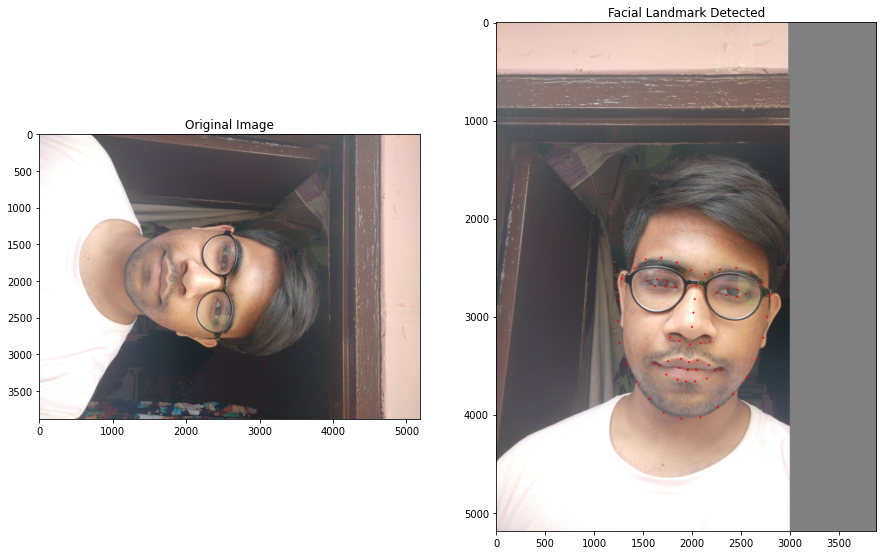

In [16]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.image as mpimg

res_img = '/content/result_facial_land.png' # landmarked image
org_img = '/content/IMG_20200920_115746.jpg' # original image

r_img = mpimg.imread(res_img)
o_img = mpimg.imread(org_img)
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_facecolor('white')
fig.set_figheight(15)
fig.set_figwidth(15)
ax1.set_title('Original Image')
ax1.imshow(o_img)
ax2.set_title('Facial Landmark Detected')
ax2.imshow(r_img)

In [17]:
# saving the above figure
fig.savefig('result_facial_1and.png')